In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRP_mz1000_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,71,0.0941,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616072
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0280,[2],0,0.334,26,0.0660,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770304
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1790,[2],0,-0.002,81,0.0840,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712741
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2940,[2],0,-0.003,20,0.1130,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108607797
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.5030,[2],0,-0.002,4,0.1970,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108608519


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRP_mz1000_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,AEIHAC[160]K/2,0.143,0.010,[2],0,0.008,17,0.050,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,342045922
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.186,0.094,[2],0,-0.002,4,0.094,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,583171072
2,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,AEDSNEQC[160]QVPHEDSSTEPEVK/3,0.080,0.017,[2],0,0.008,5,0.048,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,577870941
3,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PDALIGC[160]ENK/2,0.275,0.049,[2],0,0.494,50,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,496255812
4,b1906_293T_proteinID_01A_QE3_122212.01914.01914.3,1,ILNQPEEVLPK/3,0.349,0.000,[2],0,0.329,53,0.100,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,509945993


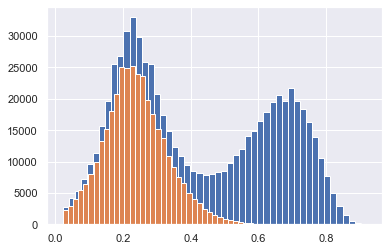

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.01526


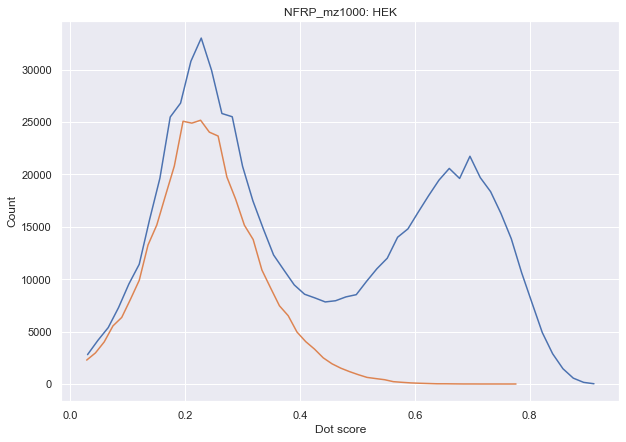

In [5]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_mz1000: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

682031
351986


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5000000000000003
nnt:  276928
nnd:  2717
FDR:  0.009811214467298358
"""

score:  0.001
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.002
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.003
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.004
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.005
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.006
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.007
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.008
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.009000000000000001
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.010000000000000002
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.011000000000000003
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.012000000000000004
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.013000000000000005
nnt:  682031
nnd:  351986
FDR:  0.5160850459876457


score:  0.014000000000000005
nnt:  682031
nnd:  351986

nnt:  657399
nnd:  327795
FDR:  0.49862412324935085


score:  0.10400000000000008
nnt:  656892
nnd:  327263
FDR:  0.49819909513283767


score:  0.10500000000000008
nnt:  656343
nnd:  326700
FDR:  0.49775803200460733


score:  0.10600000000000008
nnt:  655789
nnd:  326155
FDR:  0.4973474699941597


score:  0.10700000000000008
nnt:  655191
nnd:  325613
FDR:  0.4969741647855358


score:  0.10800000000000008
nnt:  654579
nnd:  325056
FDR:  0.4965878832043191


score:  0.10900000000000008
nnt:  654020
nnd:  324502
FDR:  0.4961652548851717


score:  0.11000000000000008
nnt:  653448
nnd:  323937
FDR:  0.495734932236383


score:  0.11100000000000008
nnt:  652852
nnd:  323358
FDR:  0.49530061943595177


score:  0.11200000000000009
nnt:  652284
nnd:  322743
FDR:  0.49478907960336294


score:  0.11300000000000009
nnt:  651698
nnd:  322167
FDR:  0.4943501437782531


score:  0.11400000000000009
nnt:  651071
nnd:  321556
FDR:  0.49388776339293256


score:  0.11500000000000009
nnt:  650465
nnd:  3209

nnt:  545476
nnd:  218983
FDR:  0.40145304284698136


score:  0.20600000000000016
nnt:  543745
nnd:  217370
FDR:  0.39976459553651067


score:  0.20700000000000016
nnt:  542089
nnd:  215807
FDR:  0.39810252560003984


score:  0.20800000000000016
nnt:  540407
nnd:  214090
FDR:  0.39616437240820346


score:  0.20900000000000016
nnt:  538650
nnd:  212405
FDR:  0.3943284136266592


score:  0.21000000000000016
nnt:  536968
nnd:  210719
FDR:  0.3924237570953949


score:  0.21100000000000016
nnt:  535244
nnd:  209063
FDR:  0.3905938226304265


score:  0.21200000000000016
nnt:  533513
nnd:  207359
FDR:  0.3886671927394459


score:  0.21300000000000016
nnt:  531777
nnd:  205718
FDR:  0.38685012702693045


score:  0.21400000000000016
nnt:  530080
nnd:  204066
FDR:  0.3849720796860851


score:  0.21500000000000016
nnt:  528311
nnd:  202441
FDR:  0.3831852829110126


score:  0.21600000000000016
nnt:  526639
nnd:  200716
FDR:  0.3811263503082757


score:  0.21700000000000016
nnt:  524924
nnd:  1990

nnt:  390231
nnd:  73225
FDR:  0.18764526652162436


score:  0.3080000000000002
nnt:  389169
nnd:  72264
FDR:  0.18568796589656422


score:  0.3090000000000002
nnt:  388104
nnd:  71275
FDR:  0.18364922804196812


score:  0.3100000000000002
nnt:  387107
nnd:  70329
FDR:  0.1816784506609284


score:  0.3110000000000002
nnt:  386006
nnd:  69319
FDR:  0.17958011015372818


score:  0.3120000000000002
nnt:  385012
nnd:  68421
FDR:  0.17771134406200326


score:  0.3130000000000002
nnt:  383956
nnd:  67503
FDR:  0.1758092073050037


score:  0.3140000000000002
nnt:  382925
nnd:  66607
FDR:  0.17394267807011818


score:  0.3150000000000002
nnt:  381943
nnd:  65741
FDR:  0.17212254184524917


score:  0.3160000000000002
nnt:  380996
nnd:  64846
FDR:  0.17020126195550608


score:  0.3170000000000002
nnt:  380017
nnd:  64001
FDR:  0.16841614980382458


score:  0.3180000000000002
nnt:  379074
nnd:  63127
FDR:  0.1665294902842189


score:  0.31900000000000023
nnt:  378116
nnd:  62255
FDR:  0.164645241

nnt:  318316
nnd:  15602
FDR:  0.049014187159929126


score:  0.4100000000000003
nnt:  317817
nnd:  15318
FDR:  0.04819754764534308


score:  0.4110000000000003
nnt:  317343
nnd:  15051
FDR:  0.047428177082840965


score:  0.4120000000000003
nnt:  316881
nnd:  14799
FDR:  0.04670207428025031


score:  0.4130000000000003
nnt:  316409
nnd:  14545
FDR:  0.04596898318315851


score:  0.4140000000000003
nnt:  315925
nnd:  14285
FDR:  0.0452164279496716


score:  0.4150000000000003
nnt:  315481
nnd:  14043
FDR:  0.044512981764353476


score:  0.4160000000000003
nnt:  315047
nnd:  13818
FDR:  0.043860122457918975


score:  0.4170000000000003
nnt:  314630
nnd:  13559
FDR:  0.043095064043479646


score:  0.4180000000000003
nnt:  314181
nnd:  13317
FDR:  0.04238639510345947


score:  0.4190000000000003
nnt:  313686
nnd:  13089
FDR:  0.04172643981561179


score:  0.4200000000000003
nnt:  313228
nnd:  12885
FDR:  0.041136169180277626


score:  0.4210000000000003
nnt:  312765
nnd:  12687
FDR:  0.04

'\n결과\nscore:  0.5000000000000003\nnnt:  276928\nnnd:  2745\nFDR:  0.00991232378091056\n'